In [2]:
import ROOT
import numpy as np
import mplhep as hep

In [3]:
f = ROOT.TFile.Open("/home/thea/devel/dune-trigger/data/vd/pre_prod/single_eminus/rawdigits/trigger_digits_waves_detsim_vd_eminus.root")

h_noise_x = f['triggerana/ADCsNoisePlaneX']
h_noise_u = f['triggerana/ADCsNoisePlaneU']
h_noise_v = f['triggerana/ADCsNoisePlaneV']


h_adc_x = f['triggerana/ADCsPlaneX']
h_adc_u = f['triggerana/ADCsPlaneU']
h_adc_v = f['triggerana/ADCsPlaneV']

h_adcs_by_plane = f['triggerana/ADCsByPlane']

In [4]:
h_adcs_by_plane.GetEntries()/3456.0/12

8500.0

In [7]:
print(f"RMS X={h_noise_x.GetRMS()}")
print(f"RMS U={h_noise_u.GetRMS()}")
print(f"RMS V={h_noise_v.GetRMS()}")

RMS X=8.818625467057176
RMS U=8.213392004251284
RMS V=8.212968876723309


In [ ]:

prob=np.array([0.5, 0.841, 0.977, 0.998, 0.9999685, 0.99999985, 0.9999974370002747, 0.999999, 0.999995, 0.99995])

prob_d = {
    'mean':  0.5,
    '1-sig': 0.841,
    '2-sig': 0.977, 
    '3-sig': 0.998, 
    '4-sig': 0.9999685, 
    '5-sig': 0.99999985, 
    'coll-ref': 0.9999974370002747, 
    '2 Hz': 0.999999,
    '10 Hz': 0.999995,
    '100 Hz': 0.99995
}


def quantiles(h, p: dict):

    from rich.table import Table
    from rich import print
    
    prob=np.array(list(p.values()))

    y=0.
    xq=np.array([0.]*len(prob))
    
    h.GetQuantiles(len(prob),xq,prob)

    # print(f"input probabilities: {prob}")
    # print(f"q values {q}")
    # print(f"distances from mean {q-q[0]}")
    # print(f"distances in sigmas {(q-q[0])[1:]/(q[1]-q[0])}")
    # print(f"distances in sigmas {(q-q[0])[1:]/h.GetStdDev()}")

    # cols = [str(i) for i in range(len(prob)+1)]
    cols = ['']+list(p.keys())
    h_std = h.GetStdDev()
    t = Table(*cols, title=h.GetName())
    t.add_row(*(['input prob']+ [str(p) for p in prob]))
    t.add_row(*(['x vals (adcs)']+ [f"{x:.2f}" for x in xq]))
    t.add_row(*(['dist from mean (adcs)']+ [f"{x:.2f}" for x in (xq-xq[0])]))
    t.add_row(*(['dist from mean (68% units)', '-']+ [f"{x:.2f}" for x in (xq-xq[0])[1:]/(xq[1]-xq[0])]))
    t.add_row(*(['dist from mean (std)', '-']+ [f"{x:.2f}" for x in (xq-xq[0])[1:]/h_std]))


    print(t)


quantiles(h_noise_x, prob_d)
quantiles(h_noise_u, prob_d)
quantiles(h_noise_v, prob_d)

                                                  ADCsNoisePlaneX                                                  
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃          ┃ mean    ┃ 1-sig   ┃ 2-sig   ┃ 3-sig   ┃ 4-sig    ┃ 5-sig    ┃ coll-r… ┃ 2 Hz     ┃ 10 Hz   ┃ 100 Hz  ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ input    │ 0.5     │ 0.841   │ 0.977   │ 0.998   │ 0.99996… │ 0.99999… │ 0.9999… │ 0.999999 │ 0.9999… │ 0.99995 │
│ prob     │         │         │         │         │          │          │         │          │         │         │
│ x vals   │ 1638.41 │ 1647.35 │ 1656.02 │ 1663.89 │ 1674.58  │ 1683.80  │ 1679.41 │ 1680.79  │ 1678.35 │ 1673.33 │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ 0.00    │ 8.93    │ 17.61   │ 25.48   │ 36.16    │ 45.38    │ 41.00   │ 42.37    │ 39.93   │ 34.92   │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 1.00    │ 1.97    │ 2.85    │ 4.05     │ 5.08     │ 4.59    │ 4.74     │ 4.47    │ 3.91    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (68%     │         │         │         │         │          │          │         │          │         │         │
│ units)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 1.01    │ 2.00    │ 2.89    │ 4.10     │ 5.15     │ 4.65    │ 4.80     │ 4.53    │ 3.96    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (std)    │         │         │         │         │          │          │         │          │         │         │
└──────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴─────────┴──────────┴─────────┴─────────┘

                                                  ADCsNoisePlaneU                                                  
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃          ┃ mean    ┃ 1-sig   ┃ 2-sig   ┃ 3-sig   ┃ 4-sig    ┃ 5-sig    ┃ coll-r… ┃ 2 Hz     ┃ 10 Hz   ┃ 100 Hz  ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ input    │ 0.5     │ 0.841   │ 0.977   │ 0.998   │ 0.99996… │ 0.99999… │ 0.9999… │ 0.999999 │ 0.9999… │ 0.99995 │
│ prob     │         │         │         │         │          │          │         │          │         │         │
│ x vals   │ 7372.47 │ 7380.46 │ 7389.66 │ 7398.22 │ 7408.76  │ 7419.81  │ 7414.75 │ 7415.95  │ 7412.88 │ 7407.69 │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ 0.00    │ 7.99    │ 17.19   │ 25.75   │ 36.29    │ 47.34    │ 42.28   │ 43.47    │ 40.41   │ 35.22   │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 1.00    │ 2.15    │ 3.22    │ 4.54     │ 5.93     │ 5.29    │ 5.44     │ 5.06    │ 4.41    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (68%     │         │         │         │         │          │          │         │          │         │         │
│ units)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 0.97    │ 2.09    │ 3.14    │ 4.42     │ 5.76     │ 5.15    │ 5.29     │ 4.92    │ 4.29    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (std)    │         │         │         │         │          │          │         │          │         │         │
└──────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴─────────┴──────────┴─────────┴─────────┘

                                                  ADCsNoisePlaneV                                                  
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃          ┃ mean    ┃ 1-sig   ┃ 2-sig   ┃ 3-sig   ┃ 4-sig    ┃ 5-sig    ┃ coll-r… ┃ 2 Hz     ┃ 10 Hz   ┃ 100 Hz  ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ input    │ 0.5     │ 0.841   │ 0.977   │ 0.998   │ 0.99996… │ 0.99999… │ 0.9999… │ 0.999999 │ 0.9999… │ 0.99995 │
│ prob     │         │         │         │         │          │          │         │          │         │         │
│ x vals   │ 7372.47 │ 7380.46 │ 7389.66 │ 7398.23 │ 7408.87  │ 7419.55  │ 7414.62 │ 7415.80  │ 7412.79 │ 7407.72 │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ 0.00    │ 7.99    │ 17.19   │ 25.76   │ 36.40    │ 47.08    │ 42.15   │ 43.33    │ 40.32   │ 35.25   │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (adcs)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 1.00    │ 2.15    │ 3.23    │ 4.56     │ 5.90     │ 5.28    │ 5.43     │ 5.05    │ 4.41    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (68%     │         │         │         │         │          │          │         │          │         │         │
│ units)   │         │         │         │         │          │          │         │          │         │         │
│ dist     │ -       │ 0.97    │ 2.09    │ 3.14    │ 4.43     │ 5.73     │ 5.13    │ 5.28     │ 4.91    │ 4.29    │
│ from     │         │         │         │         │          │          │         │          │         │         │
│ mean     │         │         │         │         │          │          │         │          │         │         │
│ (std)    │         │         │         │         │          │          │         │          │         │         │
└──────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴─────────┴──────────┴─────────┴─────────┘

/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.12/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.12/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.12/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.12/sit

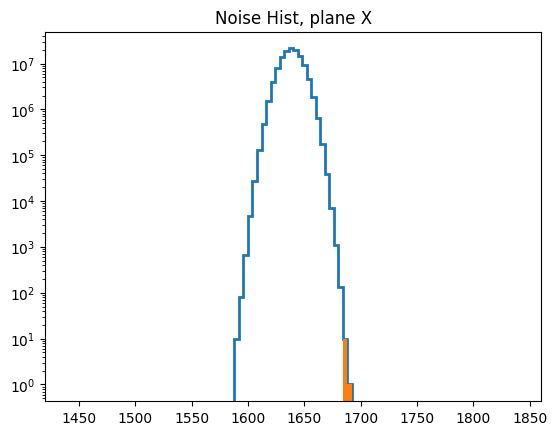

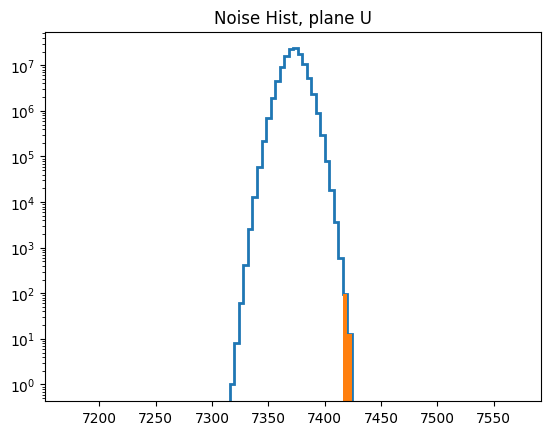

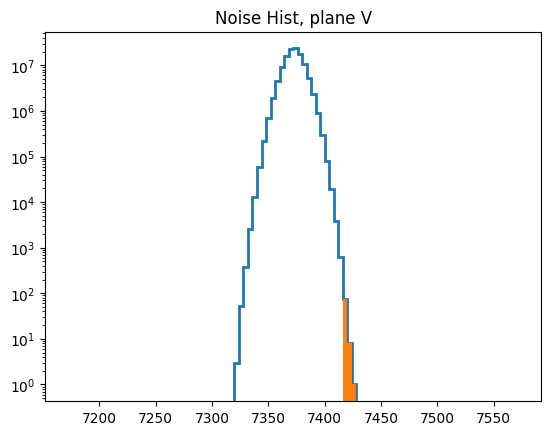

In [6]:
import mplhep as hep
import matplotlib.pyplot as plt

# ---

h = h_noise_x

fig, ax = plt.subplots()
thr = 45
m = (h.GetXaxis().FindBin(h.GetMean()))
p = (h.GetXaxis().FindBin(h.GetMean()+thr))

hep.histplot(h[m-50:m+50], label="noise plane x", linewidth=2, yerr=False, ax=ax)
hep.histplot(h[p:m+50], label="noise plane x", linewidth=2, yerr=False, ax=ax, histtype='fill')
ax.set_title("Noise Hist, plane X")
ax.set_yscale("log")

# ---

h = h_noise_u

fig, ax = plt.subplots()
thr = 42
m = (h.GetXaxis().FindBin(h.GetMean()))
p = (h.GetXaxis().FindBin(h.GetMean()+thr))

hep.histplot(h[m-50:m+50], label="noise plane u", linewidth=2, yerr=False, ax=ax)
hep.histplot(h_noise_u[p:m+50], label="noise plane u", linewidth=2, yerr=False, ax=ax, histtype='fill')
ax.set_title("Noise Hist, plane U")
ax.set_yscale("log")

# ---
h = h_noise_v

fig, ax = plt.subplots()
thr = 42
m = (h.GetXaxis().FindBin(h.GetMean()))
p = (h.GetXaxis().FindBin(h.GetMean()+thr))

hep.histplot(h[m-50:m+50], label="noise plane v", linewidth=2, yerr=False, ax=ax)
hep.histplot(h[p:m+50], label="noise plane v", linewidth=2, yerr=False, ax=ax, histtype='fill')
ax.set_title("Noise Hist, plane V")
ax.set_yscale("log")